<p><font size="6"><b> CASE - Bike count data</b></font></p>

> *© 2024, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

<img src="https://static.nieuwsblad.be/Assets/Images_Upload/2014/04/17/57b8f34e-5042-11e2-80ee-5d1d7b74455f_original.jpg.h380.jpg.568.jpg?maxheight=460&maxwidth=638&scale=both">

In this case study, we will make use of the openly available [bike count data of the city of Ghent (Belgium)](https://data.stad.gent/explore/dataset/fietstelpaal-coupure-links-2022-gent/information/?sort=-ordening). At the Coupure Links, next to the Faculty of Bioscience Engineering, a counter keeps track of the number of passing cyclists in both directions.

Data is made available by the City of Ghent, _"Mobiliteitsbedrijf Gent"_ as [licentie Gratis Hergebruik ](https://www.vlaanderen.be/digitaal-vlaanderen/onze-oplossingen/open-data/voorwaarden-voor-het-hergebruik-van-overheidsinformatie/modellicentie-gratis-hergebruik). Original data is downloaded and adjusted for exercise purpose (e.g. remove character in column name 'Code').

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Reading and processing the data

## Read csv data

The data is available on the open data portal of the city, and we downloaded them in the `CSV` format, and provide the data of 2022 zipped as `data/fietstelpaal-coupure-links-2022-gent.zip`.

This dataset contains the historical data of the bike counters, and consists of the following columns:

- `Code`: Short code used to identify the location of the bike counter
- `Locatie`: Full location name of the bike counter
- `Datum`: Date
- `Uur5Minuten`: Hour, rounded to 5-minute frequency
- `Ordening`: Time-zone aware timestamp of the counts
- `Totaal`: Total number of bikers passing
- `Hoofdrichting`: Number of bikers passing from 'Rozemarijnbrug' (centre of Ghent) to 'Contributiebrug' (Mariakerke), bikers heading north
- `Tegenrichting`: Number of bikers passing from 'Contributiebrug' (Mariakerke) to 'Rozemarijnbrug' (centre of Ghent), bikers heading south

<div class="alert alert-success">

**EXERCISE**

- Read the zipped csv file from the url into a DataFrame `df`, the delimiter of the data is `;`
- Inspect the first and last 5 rows, and check the number of observations
- Inspect the data types of the different columns

<details><summary>Hints</summary>

- With the cursor on a function, you can combine the SHIFT + TAB keystrokes to see the documentation of a function.
- Both the `sep` and `delimiter` argument will work to define the delimiter.
- Methods like `head`/`tail` have round brackets `()`, attributes like `dtypes` not.

</details>

</div>

In [2]:
df = pd.read_csv("data/fietstelpaal-coupure-links-2022-gent.zip", sep=';')

In [3]:
df.head()

,Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
0,COU,Coupure-Links,2022-01-01,0:00:00,2022-01-01T00:00:00+01:00,0,0,0
1,COU,Coupure-Links,2022-01-01,0:05:00,2022-01-01T00:05:00+01:00,2,1,1
2,COU,Coupure-Links,2022-01-01,0:10:00,2022-01-01T00:10:00+01:00,1,0,1
3,COU,Coupure-Links,2022-01-01,0:15:00,2022-01-01T00:15:00+01:00,0,0,0
4,COU,Coupure-Links,2022-01-01,0:20:00,2022-01-01T00:20:00+01:00,2,0,2


In [4]:
df.tail()

,Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
105115,COU,Coupure-Links,2022-12-31,23:35:00,2022-12-31T23:35:00+01:00,10,10,0
105116,COU,Coupure-Links,2022-12-31,23:40:00,2022-12-31T23:40:00+01:00,8,0,8
105117,COU,Coupure-Links,2022-12-31,23:45:00,2022-12-31T23:45:00+01:00,4,1,3
105118,COU,Coupure-Links,2022-12-31,23:50:00,2022-12-31T23:50:00+01:00,4,3,1
105119,COU,Coupure-Links,2022-12-31,23:55:00,2022-12-31T23:55:00+01:00,4,1,3


In [5]:
len(df)

105120

In [6]:
df.dtypes

Code             object
Locatie          object
Datum            object
Uur5Minuten      object
Ordening         object
Totaal            int64
Tegenrichting     int64
Hoofdrichting     int64
dtype: object

## Data processing

In [7]:
df.head()

,Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
0,COU,Coupure-Links,2022-01-01,0:00:00,2022-01-01T00:00:00+01:00,0,0,0
1,COU,Coupure-Links,2022-01-01,0:05:00,2022-01-01T00:05:00+01:00,2,1,1
2,COU,Coupure-Links,2022-01-01,0:10:00,2022-01-01T00:10:00+01:00,1,0,1
3,COU,Coupure-Links,2022-01-01,0:15:00,2022-01-01T00:15:00+01:00,0,0,0
4,COU,Coupure-Links,2022-01-01,0:20:00,2022-01-01T00:20:00+01:00,2,0,2


As explained above, the timestamp information is contained both in the combination of the `Datum` and `Uur5Minuten` column or the `Ordening` column. To convert to a time series, we have to convert the timestamp information to actual Pandas timestamp objects.

<div class="alert alert-success">

**EXERCISE**

Pre-process the data:

* Convert the 'Ordening' column into a pandas Timestamp Series, and assign the data to a new column named `"timestamp"`. Make sure to read the data as `UTC`
* Set the resulting `"timestamp"` column as the index of the `df` DataFrame.
* Remove the original 'Datum', 'Uur5Minuten', 'Code' and 'Ordening' columns using the `drop()` method, and call the new dataframe `df2022`.
* Rename the columns in the DataFrame 'Tegenrichting', 'Hoofdrichting' to resp. 'direction_centre', 'direction_mariakerke' using the `rename()` method. Translate the 'Locatie' columns to 'location' and the 'Totaal' column to 'total'.
    
The `rename()` and `drop()` functions are introduced in [pandas_06_data_cleaning.ipynb](./pandas_06_data_cleaning.ipynb) together with other cleaning functions required during data preprocessing.

<details><summary>Hints</summary>

- When converting strings to a `datetime` with `pd.to_datetime`, specifying the format will make the conversion a lot faster. See the format codes in the [Python documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).
- The `to_datetime` function has an option `utc=True` to convert all timestamps as UTC timestamp. Otherwise the conversion will fail.   
- `drop()` can remove both rows and columns using the names of the index or column name. Make sure to define `columns=` argument to remove columns.
- `rename()` can be used for both row and column names. It needs a dictionary with the current names as keys and the new names as values, and pass this to the `columns=` keyword for renaming the column names.

</details>

</div>

In [8]:
df["timestamp"] = pd.to_datetime(df["Ordening"], format="%Y-%m-%dT%H:%M:%S%z", utc=True)

In [9]:
df = df.set_index("timestamp")

In [10]:
df2022 = df.drop(columns=['Datum', 'Uur5Minuten', 'Ordening', 'Code'])

In [11]:
df2022 = df2022.rename(columns={'Tegenrichting': 'direction_centre',
                                'Hoofdrichting': 'direction_mariakerke',
                                'Totaal': 'total',
                                'Locatie': 'location'})

In [12]:
df2022.head()

,location,total,direction_centre,direction_mariakerke
timestamp,,,,
2021-12-31 23:00:00+00:00,Coupure-Links,0,0,0
2021-12-31 23:05:00+00:00,Coupure-Links,2,1,1
2021-12-31 23:10:00+00:00,Coupure-Links,1,0,1
2021-12-31 23:15:00+00:00,Coupure-Links,0,0,0
2021-12-31 23:20:00+00:00,Coupure-Links,2,0,2


Having the data available with an interpreted `datetime`, provides us the possibility of having time aware plotting:

<Axes: xlabel='timestamp'>

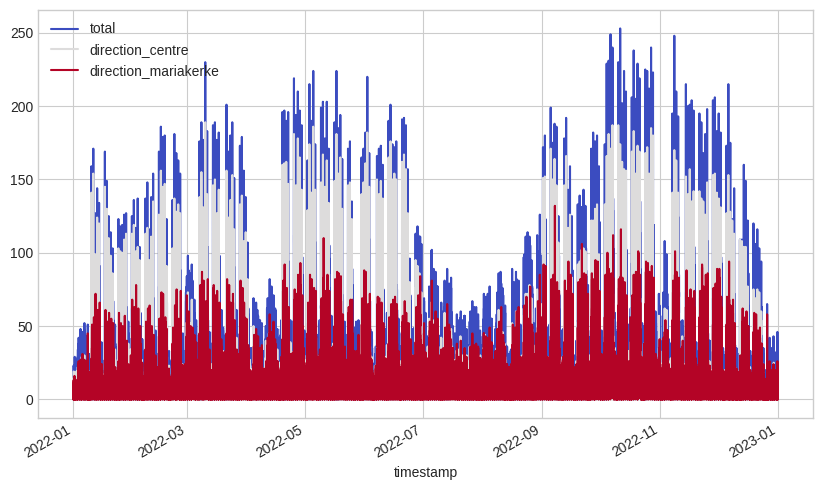

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
df2022.plot(colormap='coolwarm', ax=ax)

<div class="alert alert-info">

 <b>Remember</b>: Whenever possible, specify the date format to interpret the dates to `datetime` values!

</div>

### Write the dataset cleaning as a function

In order to make it easier to reuse the code for the pre-processing we have implemented, let's convert the code to a Python function:

<div class="alert alert-success">

**EXERCISE**

Write a function `process_bike_count_data(df)` that performs the processing steps as done above for an input Pandas DataFrame and returns the updated DataFrame. Test the functionality on the data file of 2023, `fietstelpaal-coupure-links-2023-gent.zip` and call the result `df2023`.

<details><summary>Hints</summary>

- Want to know more about proper documenting your Python functions? Check out the official guide of [numpydoc](https://numpydoc.readthedocs.io/en/latest/format.html). The `Parameters` and `Returns` sections should always be explained.

</details>

</div>

In [14]:
def process_bike_count_data(df):
    """Process the provided dataframe: parse datetimes and rename columns.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame as read from the raw `fietstellingen`,
        containing the 'Datum', 'Uur5Minuten', 
        'Ordening', 'Totaal', 'Tegenrichting', 'Hoofdrichting' columns.

    Returns
    -------
    df2 : pandas.DataFrame
        DataFrame with the datetime info as index and the
        `direction_centre` and `direction_mariakerke` columns
        with the counts.
    """
    timestamps = pd.to_datetime(df["Ordening"], format="%Y-%m-%dT%H:%M:%S%z", utc=True)    
    df2 = df.drop(columns=['Datum', 'Uur5Minuten', 'Ordening', 'Code'])
    df2["timestamp"] = timestamps
    df2 = df2.set_index("timestamp")
    df2 = df2.rename(columns={'Tegenrichting': 'direction_centre',
                              'Hoofdrichting': 'direction_mariakerke',
                              'Totaal': 'total',
                              'Locatie': 'location'
                             })
    return df2

In [15]:
df_raw = pd.read_csv("data/fietstelpaal-coupure-links-2023-gent.zip", sep=';')
df2023 = process_bike_count_data(df_raw)
df2023.tail()

,location,total,direction_centre,direction_mariakerke
timestamp,,,,
2023-07-31 21:35:00+00:00,Coupure-Links,7.0,5.0,2.0
2023-07-31 21:40:00+00:00,Coupure-Links,2.0,2.0,0.0
2023-07-31 21:45:00+00:00,Coupure-Links,2.0,2.0,0.0
2023-07-31 21:50:00+00:00,Coupure-Links,3.0,2.0,1.0
2023-07-31 21:55:00+00:00,Coupure-Links,1.0,1.0,0.0


### Store our collected dataset as an interim data product

As we finish our data-collection step, we want to save this result as an interim data output of our small investigation. As such, we do not have to re-download and process all the files each time something goes wrong, but can restart from our interim step:

```python
pd.concat([df2022, df2023]).drop(columns=["location", "total"]).sort_index().to_csv("data/fietstelpaal-coupure-links-gent.zip", index=True)
```

__Note:__ Check the notebook [pandas_09_combining_datasets.ipynb](./pandas_09_combining_datasets.ipynb) for more information on the `pd.concat` function.

## Data exploration and analysis

We now have a cleaned-up dataset of the bike counts at Coupure Links in Ghent (Belgium). Next, we want to get an impression of the characteristics and properties of the data.

### Load the processed data

Reading the file in from the interim file containing multiple years of data:

In [16]:
df = pd.read_csv("data/fietstelpaal-coupure-links-gent.zip", index_col=0, parse_dates=True)

In [17]:
df

,direction_centre,direction_mariakerke
timestamp,,
2021-12-31 23:00:00+00:00,0.0,0.0
2021-12-31 23:05:00+00:00,1.0,1.0
2021-12-31 23:10:00+00:00,0.0,1.0
2021-12-31 23:15:00+00:00,0.0,0.0
2021-12-31 23:20:00+00:00,0.0,2.0
...,...,...
2023-07-31 21:35:00+00:00,5.0,2.0
2023-07-31 21:40:00+00:00,2.0,0.0
2023-07-31 21:45:00+00:00,2.0,0.0


The timestamp data is timezone-aware in UTC. For some of the analyses further in this notebook, we will check the time of the day. In this case, it's useful to view the timestamps in the wall time of Belgium, such that the interpretation of the hours matches with our local time perception (for example, observing that there is a peak in cyclists at 8:00 in the morning).
We can convert the UTC values to local time using `tz_convert()`:

In [18]:
df = df.tz_convert("Europe/Brussels")
df

,direction_centre,direction_mariakerke
timestamp,,
2022-01-01 00:00:00+01:00,0.0,0.0
2022-01-01 00:05:00+01:00,1.0,1.0
2022-01-01 00:10:00+01:00,0.0,1.0
2022-01-01 00:15:00+01:00,0.0,0.0
2022-01-01 00:20:00+01:00,0.0,2.0
...,...,...
2023-07-31 23:35:00+02:00,5.0,2.0
2023-07-31 23:40:00+02:00,2.0,0.0
2023-07-31 23:45:00+02:00,2.0,0.0


### Count interval verification

The number of bikers are counted for intervals of approximately 5 minutes. But let's check if this is indeed the case. Calculate the difference between each of the consecutive values of the index. We can use the `Series.diff()` method:

In [19]:
df.head()

,direction_centre,direction_mariakerke
timestamp,,
2022-01-01 00:00:00+01:00,0.0,0.0
2022-01-01 00:05:00+01:00,1.0,1.0
2022-01-01 00:10:00+01:00,0.0,1.0
2022-01-01 00:15:00+01:00,0.0,0.0
2022-01-01 00:20:00+01:00,0.0,2.0


The count of the possible intervals is of interest:

In [20]:
df.index.to_series().diff().value_counts()

timestamp
0 days 00:05:00    166150
0 days 00:00:00        24
0 days 01:05:00         1
Name: count, dtype: int64

There are a few records that are not 5min. Do you know where the values of `0 days 01:05:00` and the duplicate entries with `0 days 00:00:00` are coming from?

In [21]:
df.describe()

,direction_centre,direction_mariakerke
count,162144.000000,162144.000000
mean,12.663453,12.813191
std,15.391999,13.702277
min,0.000000,0.000000
25%,3.000000,3.000000
50%,9.000000,9.000000
75%,17.000000,18.000000
max,192.000000,194.000000


### Quiet periods

<div class="alert alert-success">

**EXERCISE**

Create a new pandas Series `df_both` which contains the sum of the counts of both directions.

<details><summary>Hints</summary>

- Check the purpose of the `axis` argument of the `sum` method.

</details>

</div>

In [23]:
df_both = df.sum(axis=1)
df_both

timestamp
2022-01-01 00:00:00+01:00    0.0
2022-01-01 00:05:00+01:00    2.0
2022-01-01 00:10:00+01:00    1.0
2022-01-01 00:15:00+01:00    0.0
2022-01-01 00:20:00+01:00    2.0
                            ... 
2023-07-31 23:35:00+02:00    7.0
2023-07-31 23:40:00+02:00    2.0
2023-07-31 23:45:00+02:00    2.0
2023-07-31 23:50:00+02:00    3.0
2023-07-31 23:55:00+02:00    1.0
Length: 166176, dtype: float64

<div class="alert alert-success">

**EXERCISE**

Using the `df_both` from the previous exercise, create a new Series `df_quiet` which contains only those intervals for which less than 5 cyclists passed in both directions combined

<details><summary>Hints</summary>

- Use the `[]` to select data. You can use conditions (so-called _boolean indexing_) returning True/False inside the brackets.

</details>

</div>

In [24]:
df_quiet = df_both[df_both < 5]
df_quiet

timestamp
2022-01-01 00:00:00+01:00    0.0
2022-01-01 00:05:00+01:00    2.0
2022-01-01 00:10:00+01:00    1.0
2022-01-01 00:15:00+01:00    0.0
2022-01-01 00:20:00+01:00    2.0
                            ... 
2023-07-31 23:30:00+02:00    4.0
2023-07-31 23:40:00+02:00    2.0
2023-07-31 23:45:00+02:00    2.0
2023-07-31 23:50:00+02:00    3.0
2023-07-31 23:55:00+02:00    1.0
Length: 36847, dtype: float64

<div class="alert alert-success">

**EXERCISE**

Using the original data `df`, select only the intervals for which less than 3 cyclists passed in one or the other direction. Hence, less than 3 cyclists towards the center or less than 3 cyclists towards Mariakerke.

<details><summary>Hints</summary>

- To combine conditions use the `|` (or) or the `&` (and) operators.
- Make sure to use `()` around each individual condition.

</details>

</div>

In [25]:
df[(df['direction_centre'] < 3) | (df['direction_mariakerke'] < 3)]

,direction_centre,direction_mariakerke
timestamp,,
2022-01-01 00:00:00+01:00,0.0,0.0
2022-01-01 00:05:00+01:00,1.0,1.0
2022-01-01 00:10:00+01:00,0.0,1.0
2022-01-01 00:15:00+01:00,0.0,0.0
2022-01-01 00:20:00+01:00,0.0,2.0
...,...,...
2023-07-31 23:35:00+02:00,5.0,2.0
2023-07-31 23:40:00+02:00,2.0,0.0
2023-07-31 23:45:00+02:00,2.0,0.0


### Count statistics

<div class="alert alert-success">

**EXERCISE**

What is the average number of bikers passing every 5 min in each direction?

<details><summary>Hints</summary>

- As the time series is already 5min level, this is just the same as taking the mean.

</details>

</div>

In [26]:
df.mean()

direction_centre        12.663453
direction_mariakerke    12.813191
dtype: float64

<div class="alert alert-success">

**EXERCISE**

What is the average number of bikers passing each hour?

<details><summary>Hints</summary>

- Use `resample()` to first calculate the number of bikers passing each hour.
- `resample` requires an aggregation function that defines how to combine the values within each group (in this case all values within each hour).

</details>

</div>

In [29]:
df.resample('h').sum().mean()

direction_centre        148.285044
direction_mariakerke    150.038420
dtype: float64

<div class="alert alert-success">

**EXERCISE**

What are the 10 highest peak values observed during any of the intervals for the direction towards the center of Ghent?

<details><summary>Hints</summary>

- Pandas provides the `nsmallest` and  `nlargest` methods to derive N smallest/largest values of a column.

</details>

In [30]:
df['direction_centre'].nlargest(10)
# alternative:
# df['direction_centre'].sort_values(ascending=False).head(10)

timestamp
2023-04-27 08:15:00+02:00    192.0
2022-03-10 08:10:00+01:00    189.0
2023-05-02 08:15:00+02:00    189.0
2022-10-07 08:10:00+02:00    187.0
2022-10-10 08:15:00+02:00    187.0
2022-05-05 08:10:00+02:00    186.0
2022-10-27 08:10:00+02:00    185.0
2022-10-18 08:10:00+02:00    183.0
2022-06-02 08:10:00+02:00    182.0
2022-04-25 08:10:00+02:00    181.0
Name: direction_centre, dtype: float64

<div class="alert alert-success">

**EXERCISE**

What is the maximum number of cyclist that passed on a single day calculated on both directions combined?

<details><summary>Hints</summary>

- Combine both directions by taking the sum.
- Next, `resample` to daily values
- Get the maximum value or ask for the n largest to see the dates as well.

</details>

</div>

In [31]:
df_both = df.sum(axis=1)

In [32]:
df_daily = df_both.resample('D').sum()

In [33]:
df_daily.max()

np.float64(14014.0)

In [34]:
df_daily.nlargest(10)

timestamp
2022-10-18 00:00:00+02:00    14014.0
2022-10-04 00:00:00+02:00    13945.0
2022-10-27 00:00:00+02:00    13921.0
2022-10-11 00:00:00+02:00    13868.0
2022-10-06 00:00:00+02:00    13808.0
2023-05-04 00:00:00+02:00    13742.0
2022-10-25 00:00:00+02:00    13651.0
2023-04-19 00:00:00+02:00    13281.0
2022-10-26 00:00:00+02:00    13186.0
2022-10-19 00:00:00+02:00    13126.0
dtype: float64

### Trends as function of time

<div class="alert alert-success">

**EXERCISE**

How does the long-term trend look like? Calculate monthly sums and plot the result.

<details><summary>Hints</summary>

- The symbol for monthly resampling is `ME` or `MS`.
- Use the `plot` method of Pandas, which will generate a line plot of each numeric column by default.

</details>

</div>

<Axes: xlabel='timestamp'>

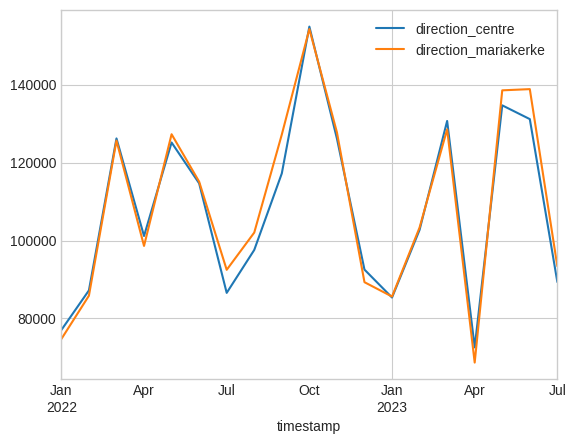

In [36]:
df_monthly = df.resample('ME').sum()
df_monthly.plot()

<div class="alert alert-success">

**EXERCISE**

Let's have a look at some short term patterns. For the data of the first 3 weeks of January 2023, calculate the hourly counts and visualize them.

<details><summary>Hints</summary>

- Slicing is done using `[]`, you can use string representation of dates to select from a `datetime` index: e.g. `'2010-01-01':'2020-12-31'`

</details>

</div>

In [37]:
df_hourly = df.resample('h').sum()

In [38]:
df_hourly.head()

,direction_centre,direction_mariakerke
timestamp,,
2022-01-01 00:00:00+01:00,15.0,15.0
2022-01-01 01:00:00+01:00,60.0,50.0
2022-01-01 02:00:00+01:00,58.0,59.0
2022-01-01 03:00:00+01:00,85.0,63.0
2022-01-01 04:00:00+01:00,85.0,65.0


<Axes: xlabel='timestamp'>

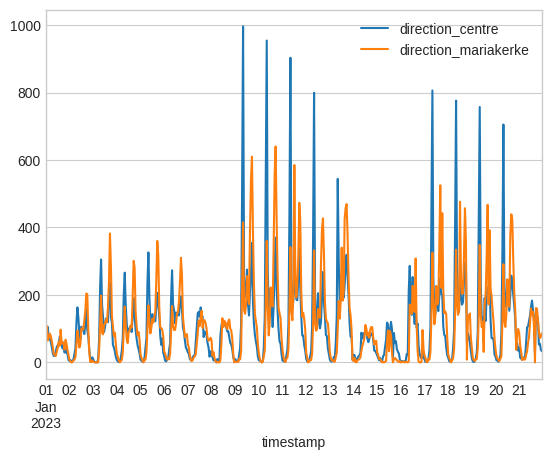

In [39]:
df_hourly['2023-01-01':'2023-01-21'].plot()

**New Year's Eve 2022-2023**

<div class="alert alert-success">

**EXERCISE**

- Select a subset of the dataset from 2022-12-31 12:00:00 until 2023-01-01 12:00:00 and assign the result to a new variable `newyear`
- Plot the selected data `newyear`.
- Use a `rolling` function with a window of 10 values (check documentation of the function) to smooth the data of this period and make a plot of the smoothed version.

<details><summary>Hints</summary>

- Just like `resample`, `rolling` requires an aggregate statistic (e.g. mean, median,...) to combine the values within the window.

</details>

</div>

In [40]:
newyear = df["2022-12-31 12:00:00": "2023-01-01 12:00:00"]

<Axes: xlabel='timestamp'>

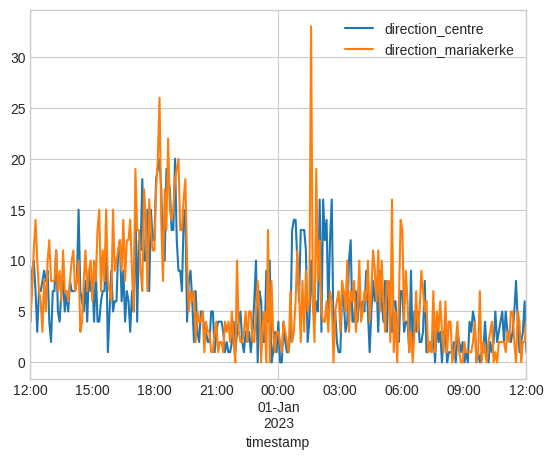

In [41]:
newyear.plot()

<Axes: xlabel='timestamp'>

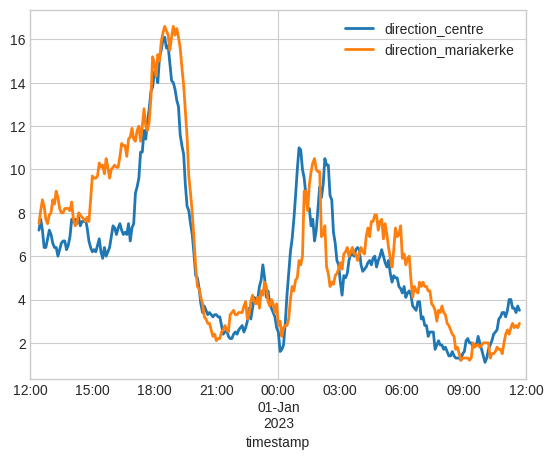

In [42]:
newyear.rolling(10, center=True).mean().plot(linewidth=2)

A more advanced usage of Matplotlib to create a combined plot:

Text(0, 0.5, 'Cyclists count')

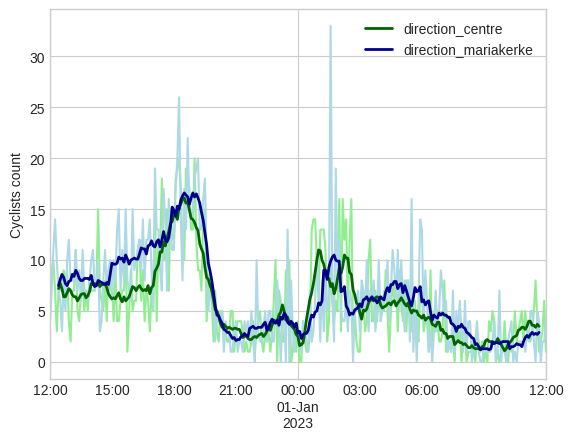

In [43]:
# A more in-detail plotting version of the graph.
fig, ax = plt.subplots()
newyear.plot(ax=ax, color=['LightGreen', 'LightBlue'], legend=False, rot=0)
newyear.rolling(10, center=True).mean().plot(linewidth=2, ax=ax, color=['DarkGreen', 'DarkBlue'], rot=0)

ax.set_xlabel('')
ax.set_ylabel('Cyclists count')

---

## The power of `groupby`...

Looking at the data in the above exercises, there seems to be clearly a:

- daily pattern
- weekly pattern
- yearly pattern

Such patterns can easily be calculated and visualized in pandas using the `DatetimeIndex` attributes `dayofweek` combined with `groupby` functionality. Below a taste of the possibilities, and we will learn about this in the proceeding notebooks:

**Weekly pattern**:

In [44]:
df_daily = df.resample('D').sum()

<Axes: xlabel='timestamp'>

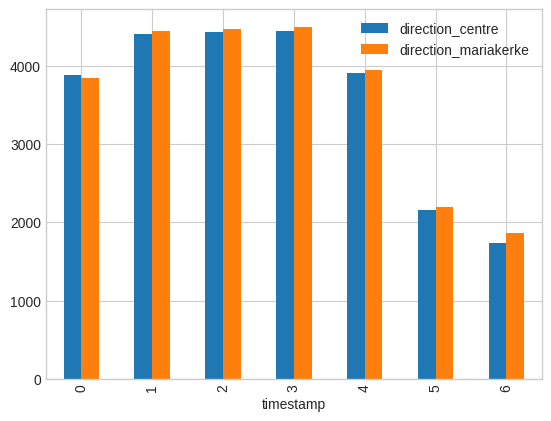

In [45]:
df_daily.groupby(df_daily.index.dayofweek).mean().plot(kind='bar')

**Daily pattern:**

In [46]:
df_hourly = df.resample('h').sum()

<Axes: xlabel='timestamp'>

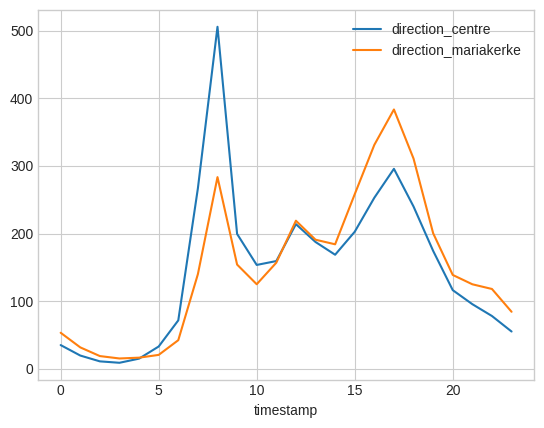

In [47]:
df_hourly.groupby(df_hourly.index.hour).mean().plot()

So the daily pattern is clearly different for both directions. In the morning more people go towards the centre, in the evening more people go back to Mariakerke. The morning peak is also more condensed.

**Monthly pattern**

In [49]:
df_monthly = df.resample('ME').sum()

In [50]:
from calendar import month_abbr

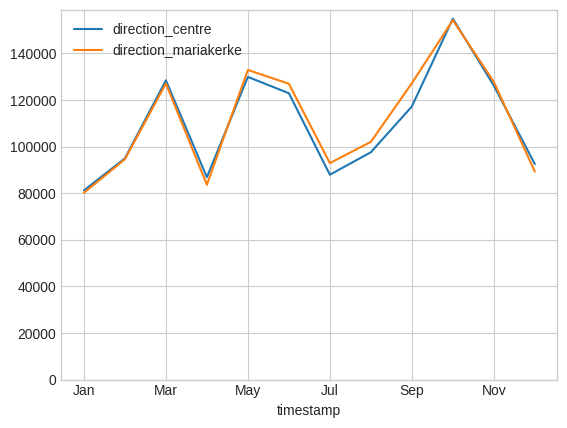

In [51]:
ax = df_monthly.groupby(df_monthly.index.month).mean().plot()
ax.set_ylim(0)
xlabels = ax.set_xticks(list(range(13))[1::2], list(month_abbr)[1::2]) #too lazy to write the month values yourself...

## Acknowledgements
Thanks to the [city of Ghent](https://data.stad.gent/) for opening their data